In [1]:
import yfinance as yf


# Download historical data for required stocks
tickers = ["AMZN","GOOG","MSFT"]
ohlcv_data = {}


# looping over tickers and storing OHLCV dataframe in dictionary
for ticker in tickers:
   temp = yf.download(ticker,period='1mo',interval='5m')
   temp.dropna(how="any",inplace=True)
   ohlcv_data[ticker] = temp


def Boll_Band(DF, n=14):
   "function to calculate Bollinger Band"
   df = DF.copy()
   df["MB"] = df["Adj Close"].rolling(n).mean()
   df["UB"] = df["MB"] + 2*df["Adj Close"].rolling(n).std(ddof=0)
   df["LB"] = df["MB"] - 2*df["Adj Close"].rolling(n).std(ddof=0)
   df["BB_Width"] = df["UB"] - df["LB"]
   return df[["MB","UB","LB","BB_Width"]]


for ticker in ohlcv_data:
   ohlcv_data[ticker][["MB","UB","LB","BB_Width"]] = Boll_Band(ohlcv_data[ticker])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
ohlcv_data['MSFT']

,Open,High,Low,Close,Adj Close,Volume,MB,UB,LB,BB_Width
Datetime,,,,,,,,,,
2023-05-15 09:30:00-04:00,309.095001,309.279999,307.700012,307.730011,307.730011,1215656,NaN,NaN,NaN,NaN
2023-05-15 09:35:00-04:00,307.748505,308.980011,307.640015,307.975006,307.975006,425198,NaN,NaN,NaN,NaN
2023-05-15 09:40:00-04:00,307.980194,309.269989,307.869995,308.949402,308.949402,460425,NaN,NaN,NaN,NaN
2023-05-15 09:45:00-04:00,308.950012,309.499512,308.679993,308.769989,308.769989,332245,NaN,NaN,NaN,NaN
2023-05-15 09:50:00-04:00,308.750000,308.850006,308.130005,308.570007,308.570007,254799,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-06-12 15:35:00-04:00,330.940002,331.429993,330.899994,331.427887,331.427887,272677,330.715210,332.119397,329.311023,2.808374
2023-06-12 15:40:00-04:00,331.450012,331.745209,331.260010,331.420013,331.420013,281010,330.838782,332.162523,329.515042,2.647481
2023-06-12 15:45:00-04:00,331.404999,331.459991,331.151215,331.399597,331.399597,277280,330.963039,332.139213,329.786865,2.352348


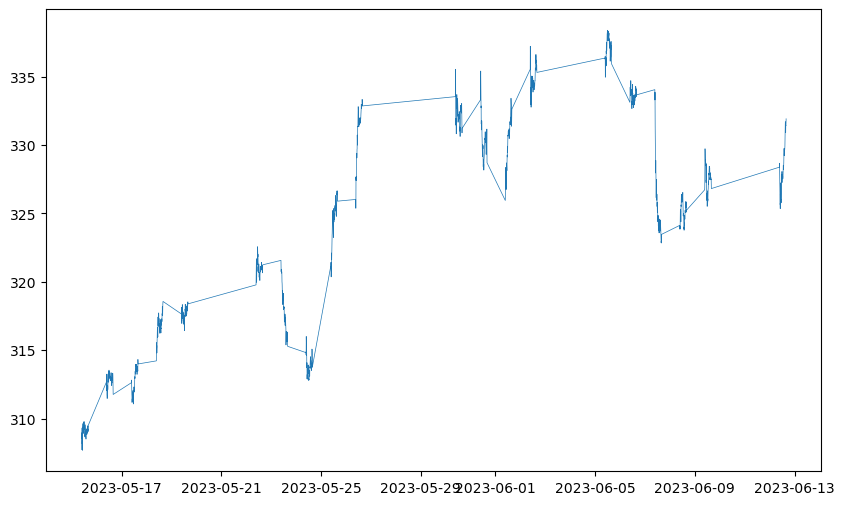

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(ohlcv_data['MSFT']['Adj Close'], linewidth=0.5)

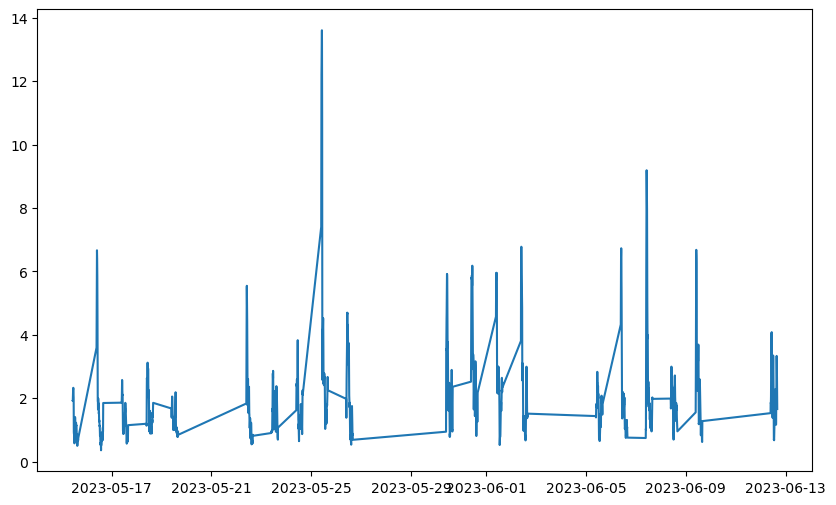

In [6]:
figure = plt.figure(figsize=(10, 6))
plt.plot(ohlcv_data['MSFT']['BB_Width'])